1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
from scipy import optimize
from scipy import stats
import pylab
import matplotlib.pyplot as plt
import pickle
from pandas import DataFrame
from pandas import read_csv

      fun: -1.0316284534891156
 hess_inv: array([[ 0.13343918, -0.00786635],
       [-0.00786635,  0.06180955]])
      jac: array([7.15255737e-07, 5.09619713e-06])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 10
     njev: 18
   status: 0
  success: True
        x: array([-0.08984197,  0.7126567 ])
--------------------
      fun: -1.0316284534898756
 hess_inv: array([[ 0.12988107, -0.00788102],
       [-0.00788102,  0.06144227]])
      jac: array([1.49011612e-08, 3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([-0.08984202,  0.71265642])
--------------------
      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])


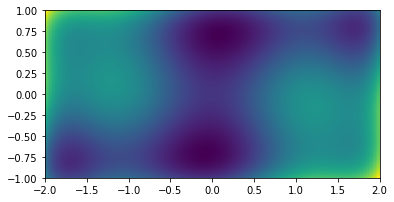

In [2]:
def f(p):
    x, y = p
    return (4 - 2.1 * x**2 + x**4/3) * x**2 + x * y + (4 * y**2  - 4) * y**2

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)

xg, yg = np.meshgrid(x, y)

z = f([xg, yg])
e = np.min(x), np.max(x), np.min(y), np.max(y)

pylab.figure()
pylab.imshow(z, extent = e)

points1 = [-2, 0]
print(optimize.minimize(f, points1))
print('--------------------')

points2 = [0, 2]
print(optimize.minimize(f, points2))
print('--------------------')

points3 = [0, 0]
print(optimize.minimize(f, points3))

# 2 global minima [-0.08984197,  0.7126567] and [-0.08984202,  0.71265642]
# the function value is aproximantly -1.0316284534 for both.

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

[17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]


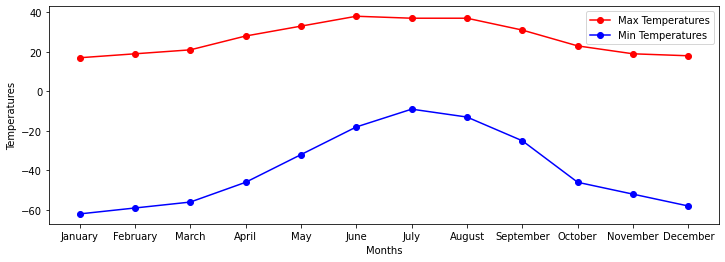

In [3]:
tempMax = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
tempMin = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']

print(tempMax)
print(tempMin)

x = np.linspace(1, 12, 12)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot_date(x, tempMax, linestyle='solid', label="Max Temperatures", color="r")
ax.plot_date(x, tempMin, linestyle='solid', label="Min Temperatures", color="b")

ax.set_xticks(x)
ax.set_xticklabels(months)
plt.xlabel("Months")
plt.ylabel("Temperatures")
plt.legend()
plt.show()

[23.09206731  6.73581537 -2.29443052 15.77935195]
[[ 1.32869170e+00 -1.60429987e-03 -1.01483036e-01 -1.08343094e+00]
 [-1.60429987e-03  6.31514979e-03  2.12240642e-04  1.91655279e-03]
 [-1.01483036e-01  2.12240642e-04  2.75445190e-02  1.70938405e-01]
 [-1.08343094e+00  1.91655279e-03  1.70938405e-01  1.38436205e+00]]
[ 52.64929229   7.16452595  -1.97590019 -61.32093705]
[[ 1.96936336e+00 -8.73505043e-04 -2.27187219e-02 -1.05130446e+00]
 [-8.73505043e-04  2.22850009e-03  4.92554788e-05  1.09101947e-03]
 [-2.27187219e-02  4.92554788e-05  5.77327411e-03  7.06520183e-02]
 [-1.05130446e+00  1.09101947e-03  7.06520183e-02  1.41330832e+00]]


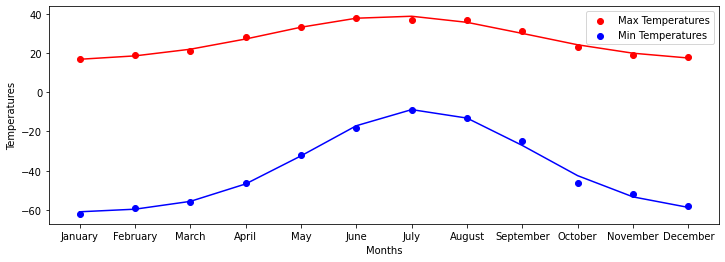

In [4]:
def f(x, a, b, c, d):
    return a * np.exp((-(x - b)**2) / (2 * c**2)) + d

poptMax, pcovMax = optimize.curve_fit(f, x, tempMax)
poptMin, pcovMin = optimize.curve_fit(f, x, tempMin)

print(poptMax)
print(pcovMax)

print(poptMin)
print(pcovMin)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, f(x, *poptMax), color='r')
ax.plot(x, f(x, *poptMin), color='b')

ax.scatter(x, tempMax, label="Max Temperatures", color='r')
ax.scatter(x, tempMin, label="Min Temperatures", color='b')

ax.set_xticks(x)
ax.set_xticklabels(months)
plt.xlabel("Months")
plt.ylabel("Temperatures")
plt.legend()

# The fit is reasonable

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [5]:
with open("data/residuals_261.pkl", 'rb') as f:
    data = pickle.load(f)

df = DataFrame(data.item(0))
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


<ErrorbarContainer object of 3 artists>

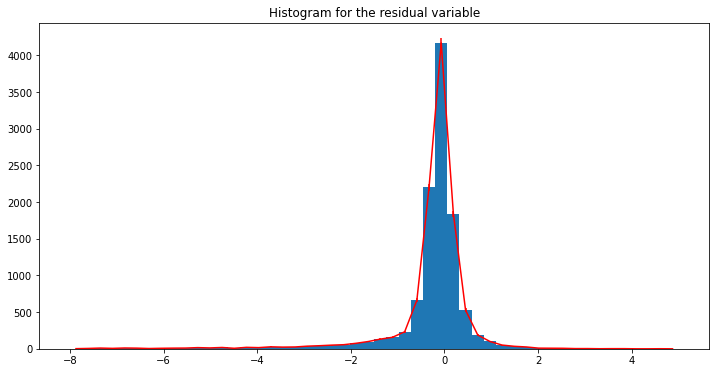

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
h, bins, _ = plt.hist(df['residuals'], bins = 50, range = (-8, 5))

ax.set_title('Histogram for the residual variable')

bin_centers = (bins[:-1] + bins[1:]) * 0.5
sigma = np.sqrt(np.abs(h)) 
ax.errorbar(x = bin_centers, y = h, yerr = sigma, color='r') 

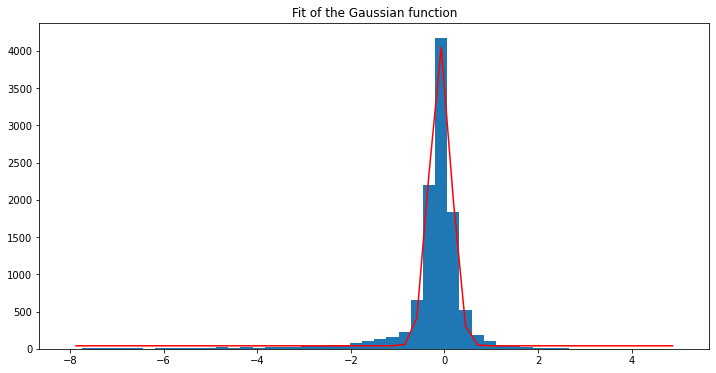

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
h, bins, _ = plt.hist(df['residuals'], bins = 50, range = (-8, 5))

ax.set_title('Fit of the Gaussian function')

def f(x, a, b, c, d):
    return a * np.exp((-(x - b)**2) / (2 * c**2)) + d

popt, pcov = optimize.curve_fit(f, bin_centers, h)

ax.plot(bin_centers, f(bin_centers, *popt), color='r')



In [8]:
ndof = len(bin_centers) - 1
print("n degrees of freedom =", ndof)
# calculate the chi^2
sigma[sigma == 0] = 1
chi2 = np.sum(((h - f(bin_centers, *popt))**2) / sigma)
print("chi2 =", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory
# The fit is unsatisfactory

n degrees of freedom = 49
chi2 = 30509.283862791646
p-value = 0.0


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

Text(0, 0.5, 'Temperatures')

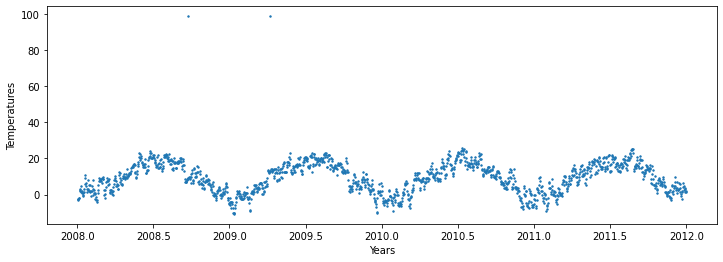

In [9]:
df = read_csv('data/munich_temperatures_average_with_bad_data.txt', delimiter = ' ', names = ['Year', 'Temp'])

df = df[df['Year'].between(2008, 2012)]

def f(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

year = df['Year']
temp = df['Temp']

popt, pcov = optimize.curve_fit(f, year, temp)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.scatter(year, temp, s = 2)

plt.xlabel("Years")
plt.ylabel("Temperatures")

Parameters - [-9.96203468 12.33174286  9.26282131]
Average temperature - 9.261252084167237


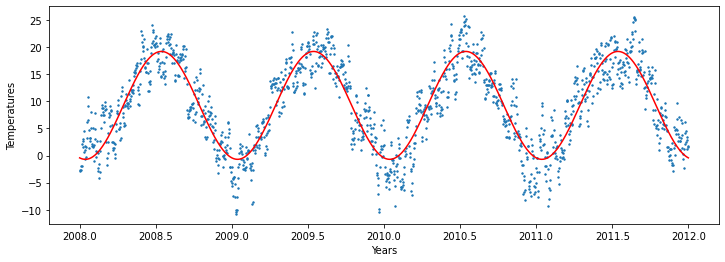

In [10]:
df = df[df['Temp'] < 90]

year = df['Year']
temp = df['Temp']

popt, pcov = optimize.curve_fit(f, year, temp)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.scatter(year, temp, s = 2)

x = np.linspace(2008, 2012, len(year))

plt.plot(x, f(x, *popt), color='r')

plt.xlabel("Years")
plt.ylabel("Temperatures")

print('Parameters -', popt)
print('Average temperature -', temp.mean())

In [11]:
df_mean = df
df_mean['Year'] = df_mean['Year'].astype(str).str.split('.', expand = True).astype(int)

print('The max average temperature:', df_mean.groupby('Year')['Temp'].max().mean())
print('The min average temperature:', df_mean.groupby('Year')['Temp'].min().mean())

The max average temperature: 24.6389
The min average temperature: -8.625005


Text(0, 0.5, 'Temperatures')

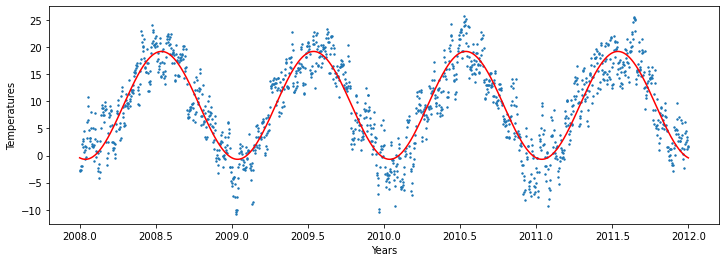

In [12]:
def f_new(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t * b + c) + d

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.scatter(year, temp, s = 2)

popt_new, pcov_new = optimize.curve_fit(f_new, year, temp)

x = np.linspace(2008, 2012, len(year))

plt.plot(x, f_new(x, *popt_new), color='r')

plt.xlabel("Years")
plt.ylabel("Temperatures")

In [13]:
y1 = f(x, *popt)
y = temp
ssr_f = np.sum((y1 - y)**2)
print(ssr_f)

y1_new = f_new(x, *popt_new)
y_new = temp
ssr_f_new = np.sum((y1_new - y_new)**2)
print(ssr_f_new)

18662.477504925067
18663.716754905952
